## Benchmarks results analysis

We show how to investigate the results of a benchmarking procedure using the benchmarks results presented in the main paper.

### Measures of hardness coverage of the benchmarks MDPs
To first get an idea of the hardness of the MDPs in the benchmarks, we
position each MDP instance according to their diameter and environmental value norm.


In [1]:
import os
import re
import seaborn as sns
from glob import glob

import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
from IPython.display import display, HTML

from colosseum.benchmark.analysis.plots import plot_labels_on_benchmarks_hardness_space, get_index
from colosseum.benchmark.analysis.tables import get_latex_table_of_average_indicator
from colosseum.utils import get_colosseum_mdp_classes
from colosseum.utils.formatter import clear_agent_mdp_class_name


def crs_in_hardness_space(experiment_result_folder_path):
    color_map = cm.get_cmap("Reds")
    _, df = get_latex_table_of_average_indicator(
        experiment_result_folder_path,
        "normalized_cumulative_regret",
        show_prm=True,
        return_table=True,
        mdps_on_row=False,
    )
    df_numerical = df.applymap(lambda s: float(re.findall("\d+\.\d+", s)[0]))

    fig, axes = plt.subplots(1, len(df.index), figsize=(len(df.index) * 8, 8))
    for a, ax in zip(df.index, axes.tolist()):
        plot_labels_on_benchmarks_hardness_space(
            experiment_result_folder_path,
            label_f=lambda x: None,
            color_f=lambda x: color_map(
                df_numerical.loc[a, get_index(x)] / df_numerical.loc[a].max()
            ),
            text_f=lambda x: df.loc[a, get_index(x)],
            ax=ax,
        )
        ax.set_title(a[0], fontdict=dict(fontsize=22))
    plt.tight_layout()
    plt.show()


sns.set_theme()

available_experiments = list(
    sorted(
        filter(
            lambda x: x.split(os.sep)[-1][0] != "_",
            glob(f"experiments_done{os.sep}*"),
        )
    )
)
assert available_experiments == [
    "experiments_done/benchmark_continuous_communicating",
    "experiments_done/benchmark_continuous_ergodic",
    "experiments_done/benchmark_episodic_communicating",
    "experiments_done/benchmark_episodic_ergodic",
]

/home/michelangelo/miniconda3/envs/test37/lib/python3.7/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/michelangelo/miniconda3/envs/test37/lib/python3.7/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


benchmark_episodic_ergodic: 100%|██████████| 7/7 [03:24<00:00, 29.19s/it]


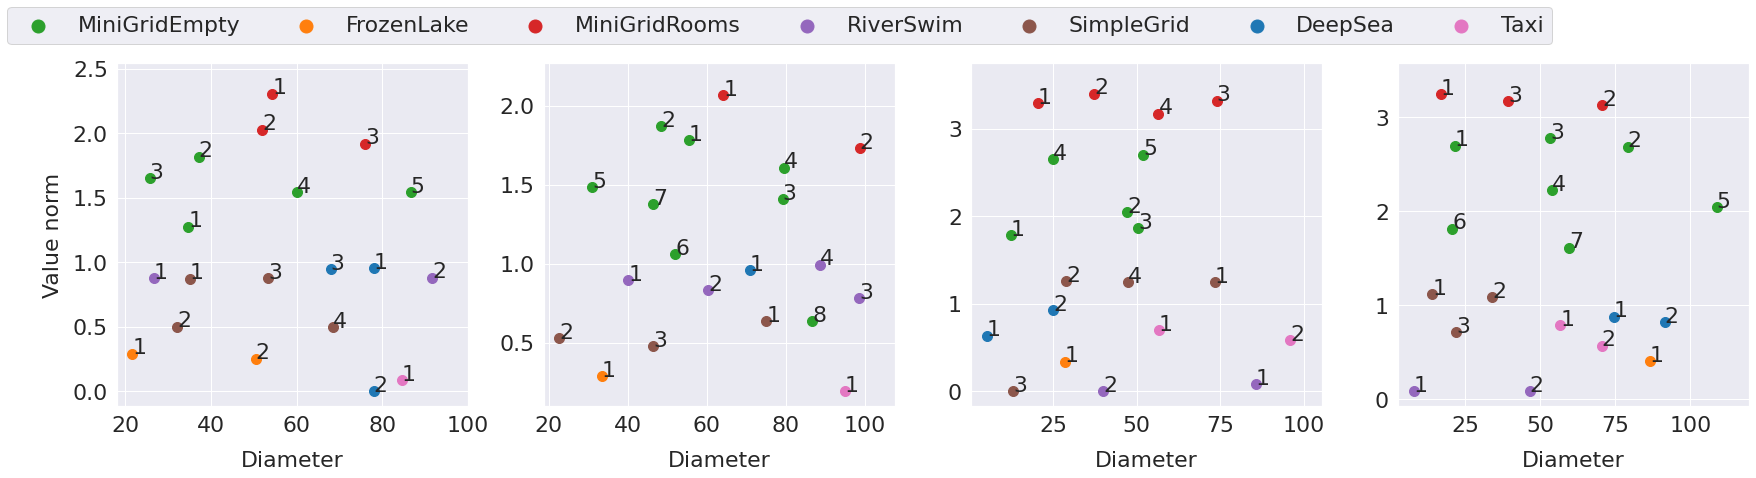

In [2]:
mdp_names = sorted(
    set(clear_agent_mdp_class_name(x.__name__) for x in get_colosseum_mdp_classes())
)
COLORS = list(matplotlib.colors.TABLEAU_COLORS.keys())
fig, axes = plt.subplots(1, 4, figsize=(4 * 6, 6))  # , sharey=True)
for ii, exp_to_show in enumerate(available_experiments):
    plot_labels_on_benchmarks_hardness_space(
        exp_to_show,
        text_f=lambda x: str(int(x[1][-1]) + 1),
        color_f=lambda x: COLORS[
            mdp_names.index(clear_agent_mdp_class_name(x[0].__name__))
        ],
        label_f=lambda x: clear_agent_mdp_class_name(x[0].__name__)
        if "0" in x[1]
        else None,
        ax=axes[ii],
        multiplicative_factor_xlim=1.05,
        multiplicative_factor_ylim=1.05,
        set_ylabel=ii == 0,
        set_legend=False,
        # xaxis_measure=("num_states", lambda x : x.num_states)
        # xaxis_measure = "suboptimal_gaps"
    )

plt.tight_layout()
leg = plt.legend(
    fontsize=22,
    ncol=8,
    loc="center left",
    bbox_to_anchor=(-4.0, 1.11),
    markerscale=1.3,
)
for x in leg.get_lines():
    x.set_linewidth(4)
plt.show()

### Cumulative regrets in hardness space

For each benchmark and set of agents, we position the agents' final normalized cumulative regrets in the hardness space of the corresponding MDP instance.
In this way, we show how the performances of the agents are influenced by the different aspects of hardness of the MDP instances.

#### Benchmark continuous communicating
We note that increasing values of the diameter induce higher regret for UCRL2 and QLearning but not for PSRL.
UCRL2's regrets are not significantly influenced by the value norms, contrary to QLearning and PSRL.
Interestingly, higher values of the value norm yield lower regrets for QLearning and higher regrets for PSRL.


benchmark_continuous_communicating: 100%|██████████| 7/7 [00:00<00:00,  9.42it/s]


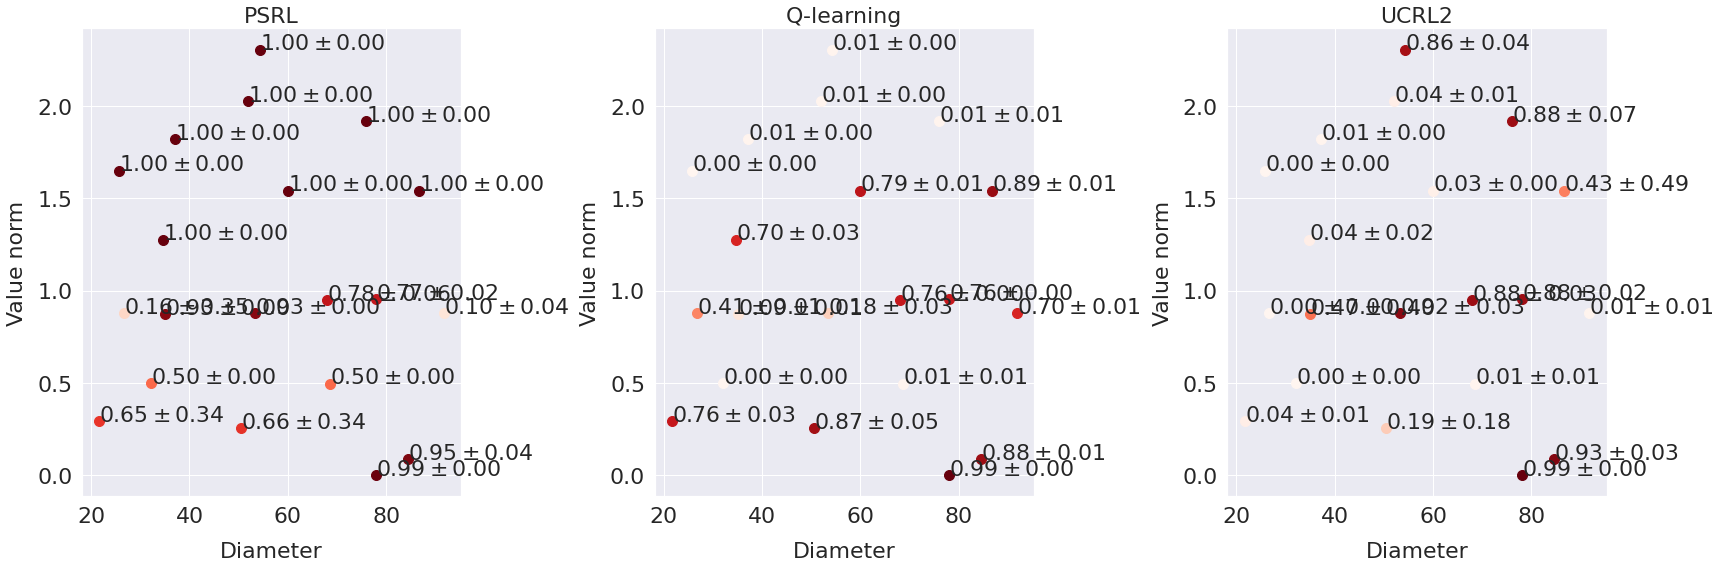

In [3]:
crs_in_hardness_space(available_experiments[0])

#### Benchmark continuous ergodic
In this case, the increases in the value norm and the diameter produce increases in the regret in a similar way.
A similar phenomenon can be seen for QLearning.
For PSRL, instead, the ergodic case looks very similar to the communicating one.


benchmark_continuous_ergodic: 100%|██████████| 7/7 [00:00<00:00, 12.37it/s]


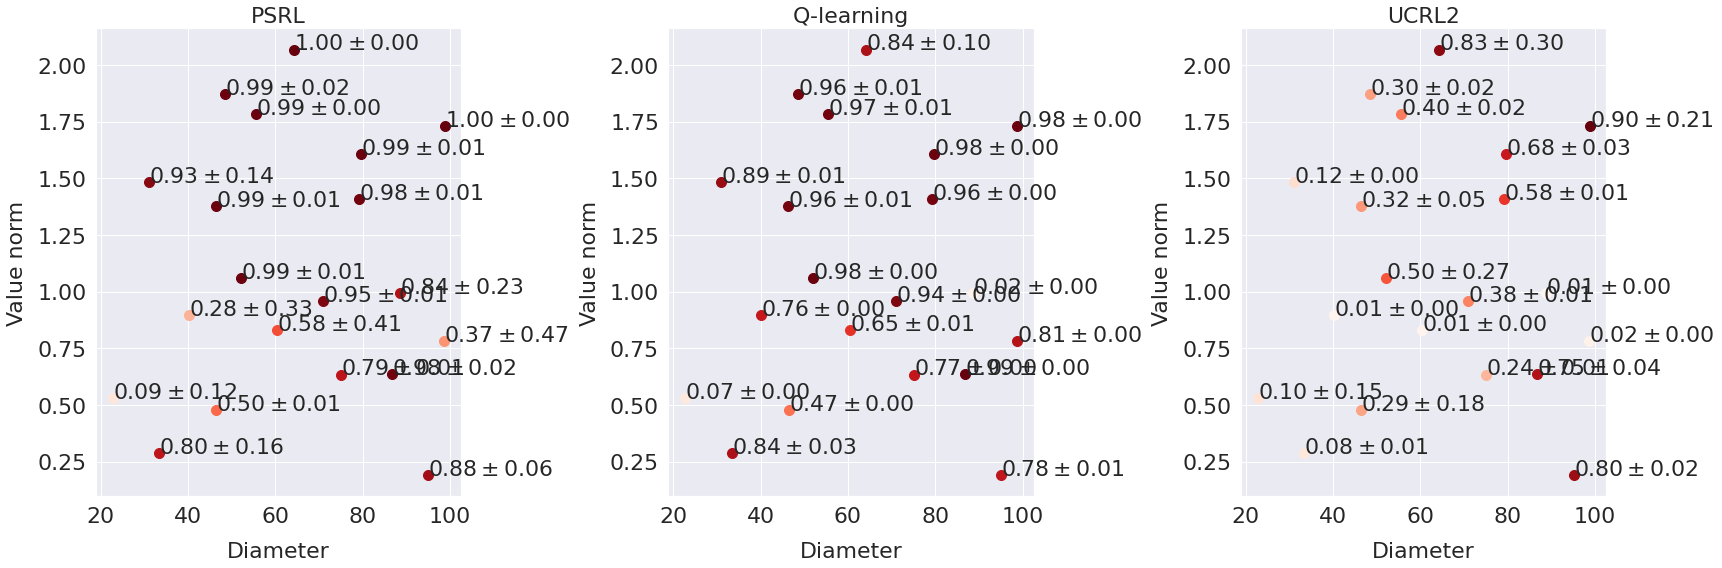

In [4]:
crs_in_hardness_space(available_experiments[1])

#### Benchmark episodic communicating
In this scenario, we see that the diameter has relatively low influence on the cumulative regrets of the agents.
Increases in the environmental value norm induce more significant increases in the regrets, particularly for PSRL.



benchmark_episodic_communicating: 100%|██████████| 7/7 [02:47<00:00, 23.99s/it]


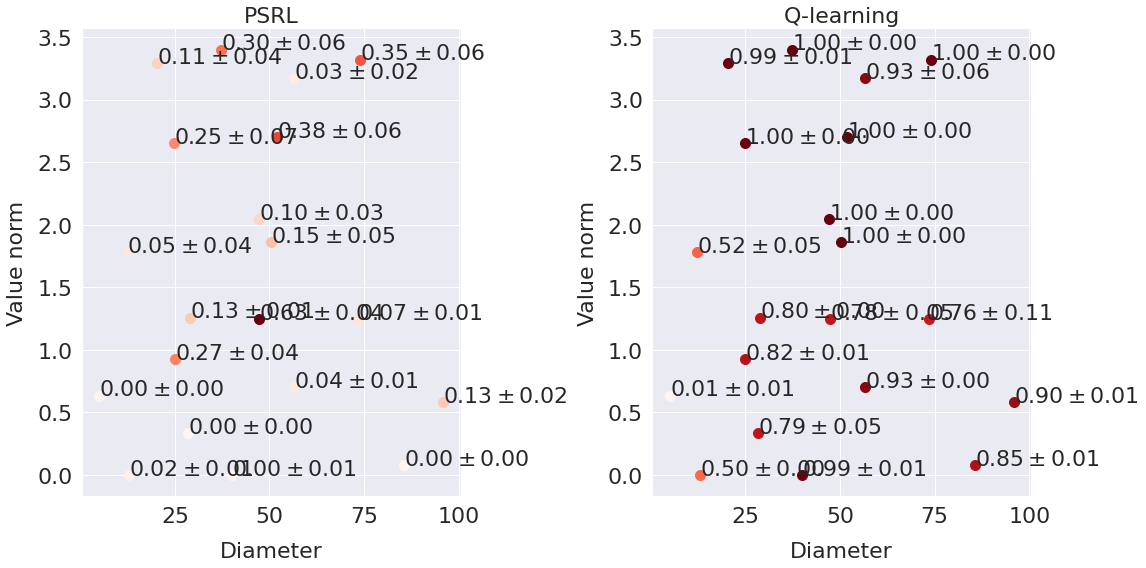

In [5]:
crs_in_hardness_space(available_experiments[2])

#### Benchmark episodic ergodic
Contrary to the communicating case, here increasing values of the diameter yield more significant increases of the regrets.
Especially for high values of environmental value norm.
Similarly to the previous scenario, the environmental value norm drives significant increases in the regrets of the agents,
in a more pronounced way for QLearning.

benchmark_episodic_ergodic: 100%|██████████| 7/7 [03:28<00:00, 29.78s/it]


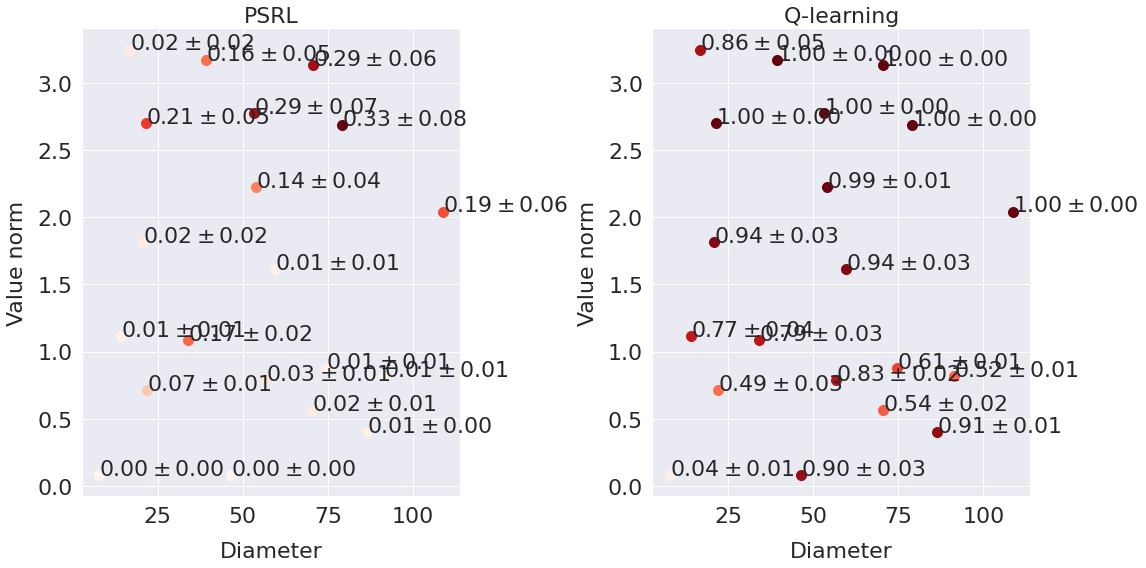

In [6]:
crs_in_hardness_space(available_experiments[3])